# Estimation des coûts de la pauvreté au Québec
## Tableau interactif

### Créé: 29 avril 2023
### Dernière mise à jour: 29 avril 2023



## Objectif

Avoir une représentation interactive des coûts de la pauvreté au Québec qui permet de montrer et modifier le rôle des composantes. Par exemple, qu'est-ce qui arrive si le rôle du revenu sur l'utilisation du système de santé était expliqué à 25, 50, ou 75% par d'autres variables (p.ex., le sexe, la région, ou l'appartenance ethnique)?

## Fonctionnement

Cette page est une page *Jupyter Notebook* qui utilise la librarie *Matplotlib* de Python pour produire une illustration graphique. La logique est de présenter un diagramme circulaire (*pie chart*) avec différents *sliders* et boutons qui permettent d'ajuster la contribution des différents éléments. 



<IPython.core.display.Javascript object>


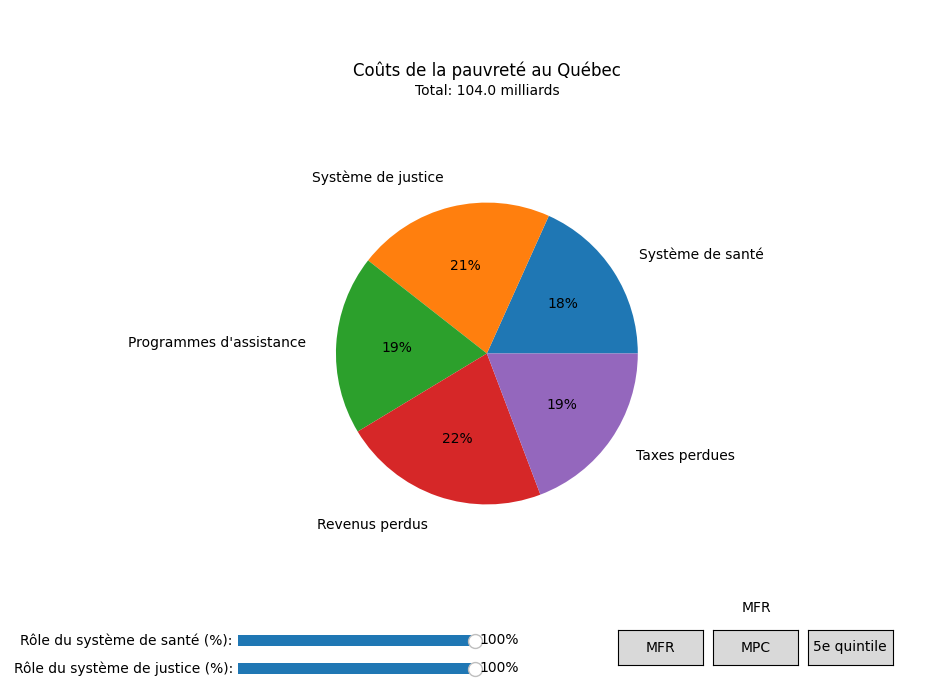

In [230]:
%matplotlib notebook

import random as rm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

# rm.seed(1)

df = pd.DataFrame(np.zeros([5,2]), columns = ["type", "totalcost"])

typelist = ["Système de santé", 
            "Système de justice", 
            "Programmes d'assistance", 
            "Revenus perdus", 
            "Taxes perdues"]

for count, x in enumerate(typelist):
    df.iloc[count, 0] = x
    df.iloc[count, 1] = rm.randrange(10, 30)
    

df.iloc[4, 1] = 20
print("")
fig, ax = plt.subplots(figsize=(9.5, 7))
ax.pie(df["totalcost"], labels = df["type"], autopct='%1.0f%%', radius = 0.7, labeldistance = 1.2)
ax.text(0, 1.2, "Total: {} milliards".format(sum(df["totalcost"])), horizontalalignment = "center")
ax.text(1.25, -1.2, "MFR", horizontalalignment = "center")
ax.set_title("Coûts de la pauvreté au Québec")

#####################
### ADDING SLIDES
#####################

# https://matplotlib.org/stable/gallery/widgets/slider_demo.html

# Make a horizontal slider to control the frequency.
ax_health = fig.add_axes([0.25, 0.07, 0.25, 0.03])
slider_health = Slider(
    ax=ax_health,
    label='Rôle du système de santé (%):',
    valmin=0,
    valmax=100,
    valinit=100,
    valfmt="%1.0f%%" 
)

ax_justice = fig.add_axes([0.25, 0.03, 0.25, 0.03])
slider_justice = Slider(
    ax=ax_justice,
    label='Rôle du système de justice (%):',
    valmin=0,
    valmax=100,
    valinit=100,
    valfmt="%1.0f%%" 
)

# The function to be called anytime a slider's value changes
def update_health(val):
    resultlist = []
    for x in df["totalcost"]:
        resultlist.append(x)
    resultlist[0] = resultlist[0] * val /100
    ax.clear()
    ax.pie(resultlist, labels = typelist, autopct='%1.0f%%', radius = 0.7, labeldistance = 1.2)
    ax.text(0, 1.2, "Total: {} milliards".format(round(sum(resultlist), 0)), horizontalalignment = "center")
    ax.set_title("Coûts de la pauvreté au Québec")
    fig.canvas.draw_idle()
    
def update_justice(val):
    resultlist = []
    for x in df["totalcost"]:
        resultlist.append(x)
    resultlist[1] = resultlist[1] * val /100
    ax.clear()
    ax.pie(resultlist, labels = typelist, autopct='%1.0f%%', radius = 0.7, labeldistance = 1.2)
    ax.text(0, 1.2, "Total: {} milliards".format(round(sum(resultlist), 0)), horizontalalignment = "center")
    ax.set_title("Coûts de la pauvreté au Québec")
    fig.canvas.draw_idle()

# register the update function with each slider
slider_health.on_changed(update_health)
slider_justice.on_changed(update_justice)

#####################
### ADDING BUTTONS
#####################

# https://matplotlib.org/stable/gallery/widgets/buttons.html

def revenu1(val):
    resultlist = []
    for x in df["totalcost"]:
        resultlist.append(x)
    resultlist[4] = 20
    ax.clear()
    ax.pie(resultlist, labels = typelist, autopct='%1.0f%%', radius = 0.7, labeldistance = 1.2)
    ax.set_title("Coûts de la pauvreté au Québec")
    ax.text(0, 1.2, "Total: {} milliards".format(round(sum(resultlist), 0)), horizontalalignment = "center")
    ax.text(1.25, -1.2, "MFR", horizontalalignment = "center")
    fig.canvas.draw_idle()

def revenu2(val):
    resultlist = []
    for x in df["totalcost"]:
        resultlist.append(x)
    resultlist[4] = 30
    ax.clear()
    ax.pie(resultlist, labels = typelist, autopct='%1.0f%%', radius = 0.7, labeldistance = 1.2)
    ax.set_title("Coûts de la pauvreté au Québec")
    ax.text(0, 1.2, "Total: {} milliards".format(round(sum(resultlist), 0)), horizontalalignment = "center")
    ax.text(1.25, -1.2, "MPC", horizontalalignment = "center")
    fig.canvas.draw_idle()

def revenu3(val):
    resultlist = []
    for x in df["totalcost"]:
        resultlist.append(x)
    resultlist[4] = 40
    ax.clear()
    ax.pie(resultlist, labels = typelist, autopct='%1.0f%%', radius = 0.7, labeldistance = 1.2)
    ax.set_title("Coûts de la pauvreté au Québec")
    ax.text(0, 1.2, "Total: {} milliards".format(round(sum(resultlist), 0)), horizontalalignment = "center")
    ax.text(1.25, -1.2, "5e quintile", horizontalalignment = "center")
    fig.canvas.draw_idle()

ax_revenu1 = fig.add_axes([0.65, 0.05, 0.09, 0.05])
ax_revenu2 = fig.add_axes([0.75, 0.05, 0.09, 0.05])
ax_revenu3 = fig.add_axes([0.85, 0.05, 0.09, 0.05])
but_revenu1 = Button(ax_revenu1, "MFR")
but_revenu2 = Button(ax_revenu2, "MPC")
but_revenu3 = Button(ax_revenu3, "5e quintile")
but_revenu1.on_clicked(revenu1)
but_revenu2.on_clicked(revenu2)
but_revenu3.on_clicked(revenu3)

### END

plt.show()